In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display,HTML
import os
import plotly.express as ex

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [6]:
df = pd.read_csv('/players_21.csv')

In [7]:
df.shape

(18944, 106)

In [9]:
cols = []
for i in df.columns:
  cols.append(i)

In [10]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

In [11]:
cols_to_impute = df.loc[:,['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

In [12]:
cols_to_impute.head()

,pace,shooting,passing,dribbling,defending,physic
0,85.0,92.0,91.0,95.0,38.0,65.0
1,89.0,93.0,81.0,89.0,35.0,77.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,78.0,91.0,78.0,85.0,43.0,82.0
4,91.0,85.0,86.0,94.0,36.0,59.0


In [13]:
for i in cols_to_impute.columns:
  df[i].fillna(df[i].mean(), inplace = True)

In [14]:
cols_with_null = df.isnull().any()

print(cols_with_null)

sofifa_id                     False
player_url                    False
short_name                    False
long_name                     False
age                           False
dob                           False
height_cm                     False
weight_kg                     False
nationality                   False
club_name                      True
league_name                    True
league_rank                    True
overall                       False
potential                     False
value_eur                     False
wage_eur                      False
player_positions              False
preferred_foot                False
international_reputation      False
weak_foot                     False
skill_moves                   False
work_rate                     False
body_type                     False
real_face                     False
release_clause_eur             True
player_tags                    True
team_position                  True
team_jersey_number          

In [15]:
nullcol_names = cols_with_null[cols_with_null].index.tolist()

print(nullcol_names)

['club_name', 'league_name', 'league_rank', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'defending_marking']


# Plotting count of players based on their Heights

Text(0, 0.5, 'number of players')

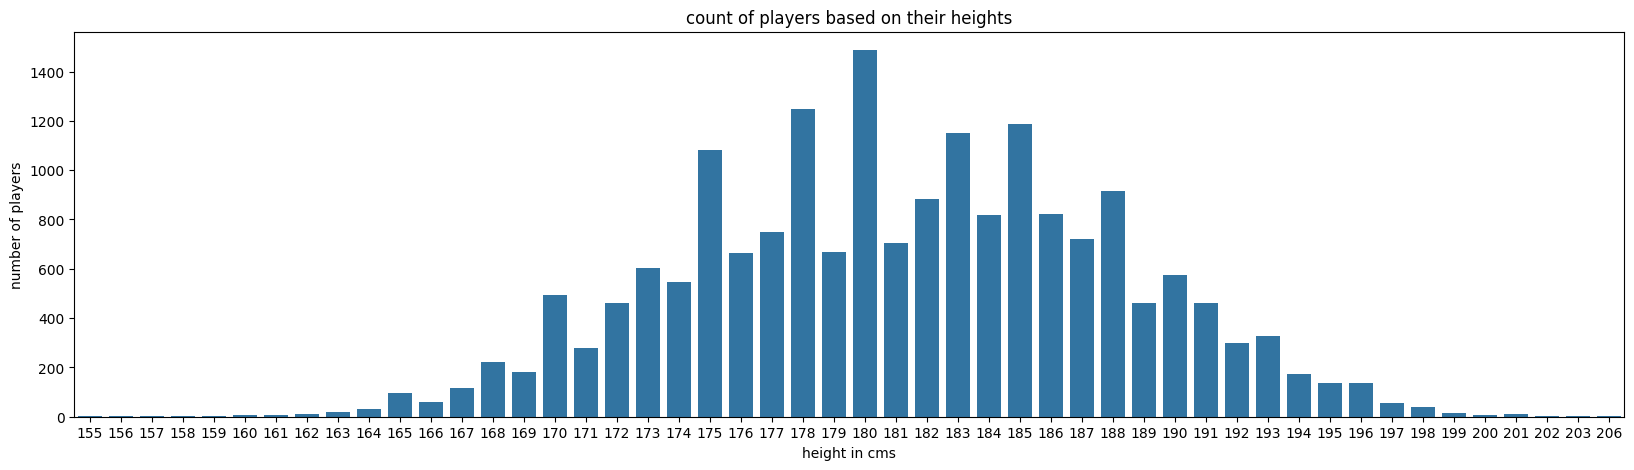

In [16]:
plt.figure(figsize = (20,5))

ax = sns.countplot(x = 'height_cm', data= df)

ax.set_title("count of players based on their heights")

ax.set_xlabel("height in cms")
ax.set_ylabel("number of players")

# Relationship between height of the players and their dribbling skills

<Axes: title={'center': 'relationship between height of the player and his dribbling skills'}, xlabel='height in cms', ylabel='dribbling skills'>

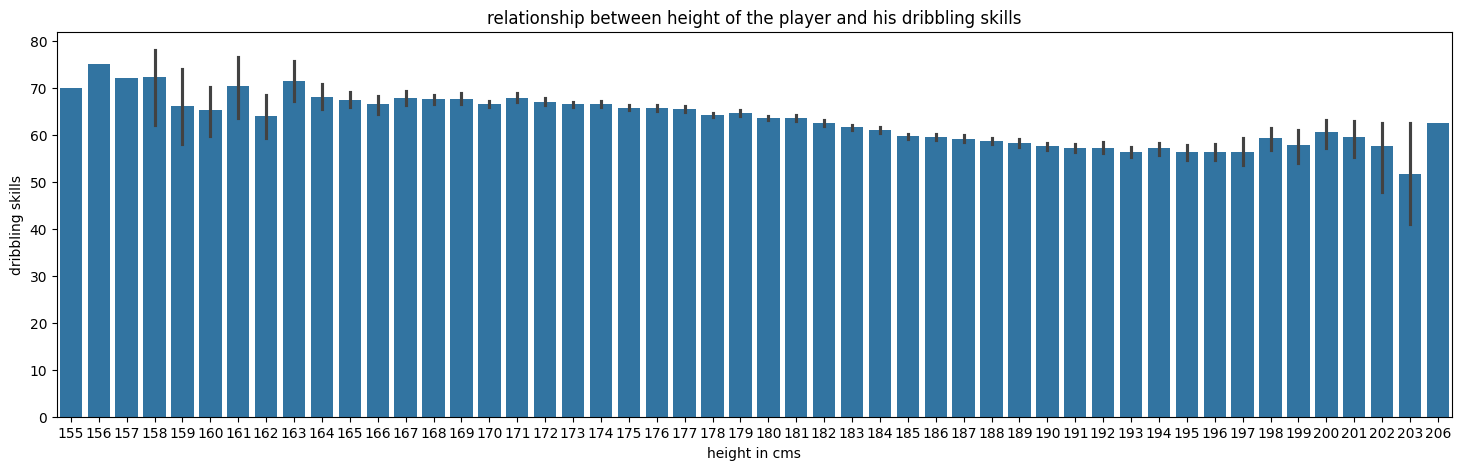

In [17]:
plt.figure(figsize = (18,5))

plt.title("relationship between height of the player and his dribbling skills")

plt.xlabel('height in cms')
plt.ylabel('dribbling skills')

sns.barplot(x = 'height_cm', y = 'dribbling', data = df.sort_values('height_cm', inplace = False))

# Relationship between weight- of the players and their dribbling skills

<Axes: title={'center': 'relationship between weight of the player and his dribbling skills'}, xlabel='weight in cms', ylabel='dribbling skills'>

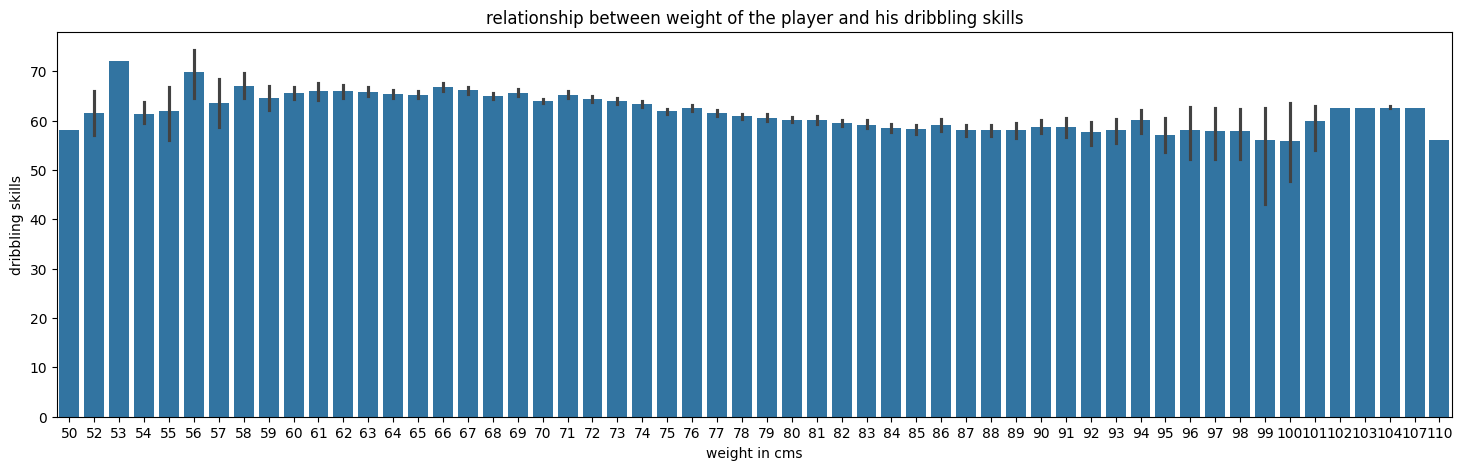

In [18]:
plt.figure(figsize = (18,5))

plt.title("relationship between weight of the player and his dribbling skills")

plt.xlabel('weight in cms')
plt.ylabel('dribbling skills')

sns.barplot(x = 'weight_kg', y = 'dribbling', data = df.sort_values('weight_kg', inplace = False))

# Messi Vs Ronaldo

In [19]:
skills = [
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots'
]

In [20]:
messi = df.loc[df['short_name'] == "L. Messi"]
messi = pd.DataFrame(messi, columns = skills)

ronaldo = df.loc[df['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)

In [21]:
messi.head()

,pace,shooting,passing,dribbling,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
0,85.0,92.0,91.0,95.0,65.0,85,95,70,91,88,91,80,91,94,95,86,68,72,69,94


In [22]:
ronaldo.head()

,pace,shooting,passing,dribbling,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,89.0,93.0,81.0,89.0,77.0,84,95,90,82,86,87,91,87,95,71,94,95,84,78,93


Text(0, 0.5, 'values')

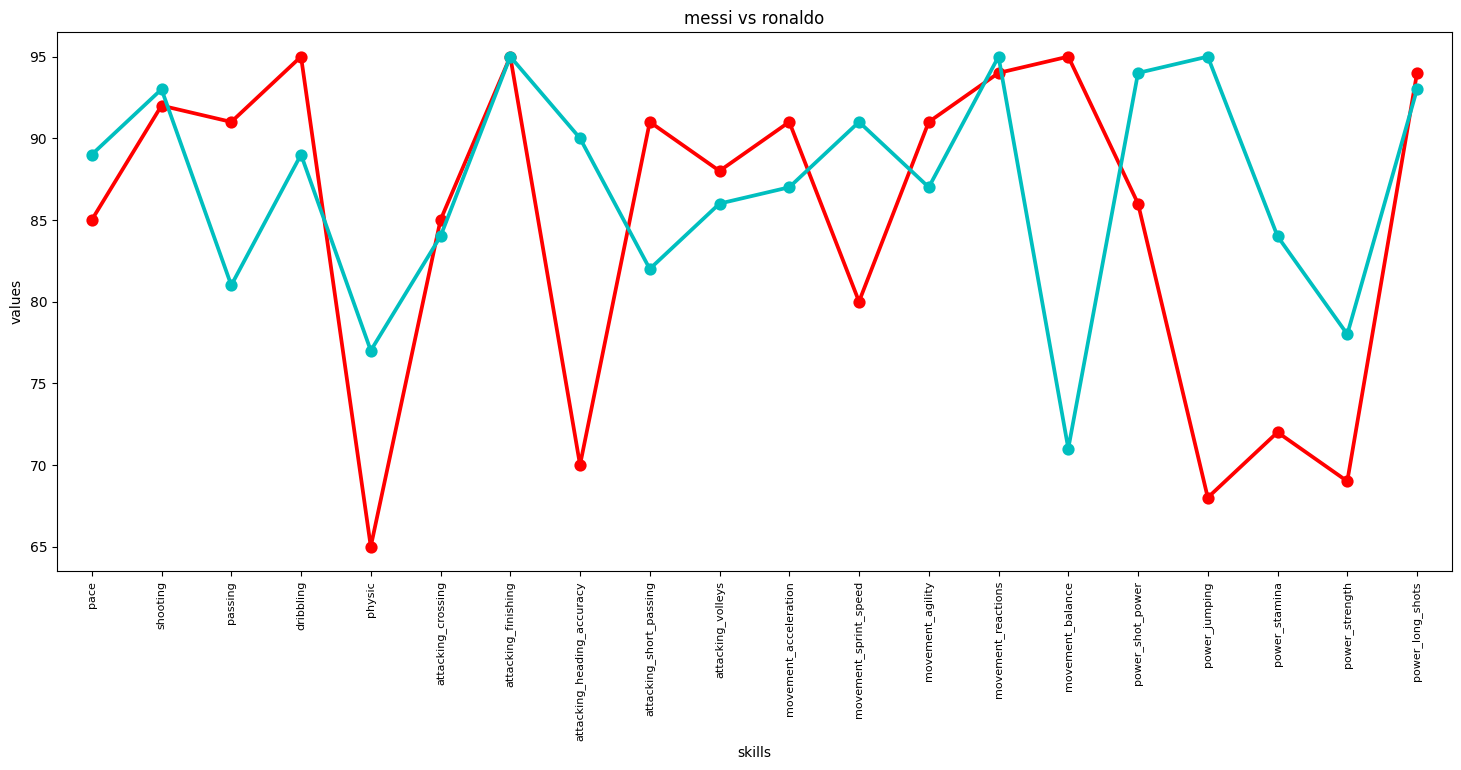

In [23]:
plt.figure(figsize = (18,7))

sns.pointplot(data = messi, color = 'r')
sns.pointplot(data = ronaldo, color = 'c')

plt.title("messi vs ronaldo")

plt.xlabel("skills")
plt.xticks(rotation = 90, fontsize=8)
plt.ylabel("values")

# Top 10 Players

In [24]:
display(HTML(df.sort_values('overall', ascending = False)[['short_name','overall']][:10].to_html(index = False)))

short_name,overall
L. Messi,93
Cristiano Ronaldo,92
J. Oblak,91
R. Lewandowski,91
Neymar Jr,91
K. De Bruyne,91
Alisson,90
S. Mané,90
M. Salah,90
V. van Dijk,90


# Top 5 nations with overall best player

In [25]:
top_nations = df.groupby(['nationality'])['overall'].max().sort_values(ascending = False)

top_nations.head()

nationality
Argentina    93
Portugal     92
Poland       91
Brazil       91
Slovenia     91
Name: overall, dtype: int64

# Age distribution of players in Countries

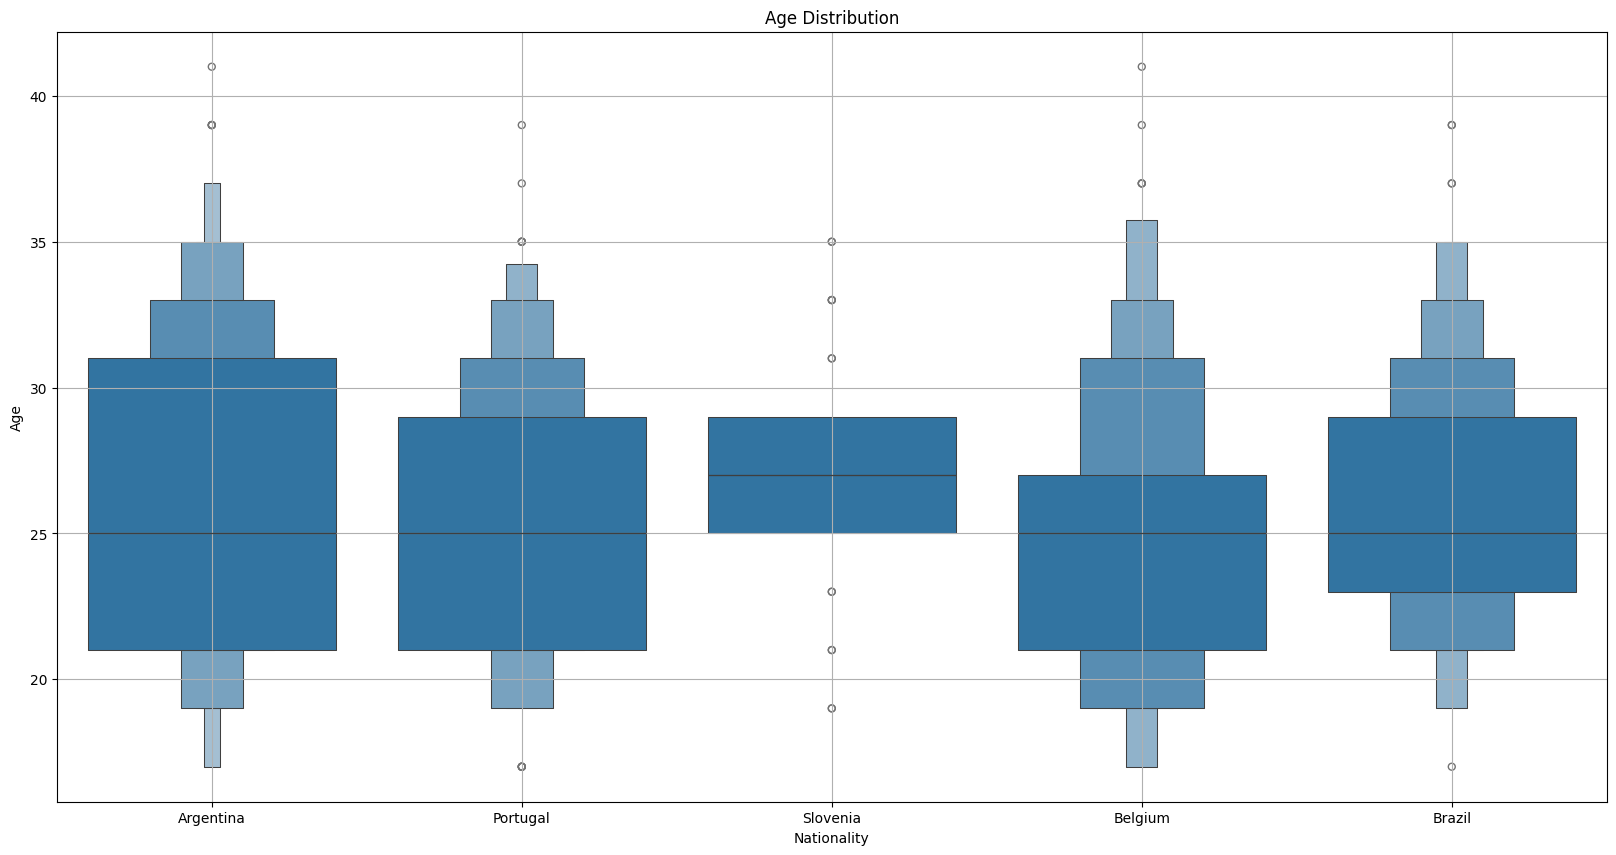

In [26]:
country_name = ['Argentina', 'Portugal', 'Belgium', 'Brazil', 'Slovenia']

countries = df.loc[df['nationality'].isin(country_name) & df['age']]

fig, ax = plt.subplots()

fig.set_size_inches(20,10)

ax = sns.boxenplot(x = 'nationality', y = 'age', data = countries)

ax.set_title("Age Distribution")
ax.set_xlabel("Nationality")
ax.set_ylabel("Age")

plt.grid()

plt.show()

# Age distribution of players in clubs

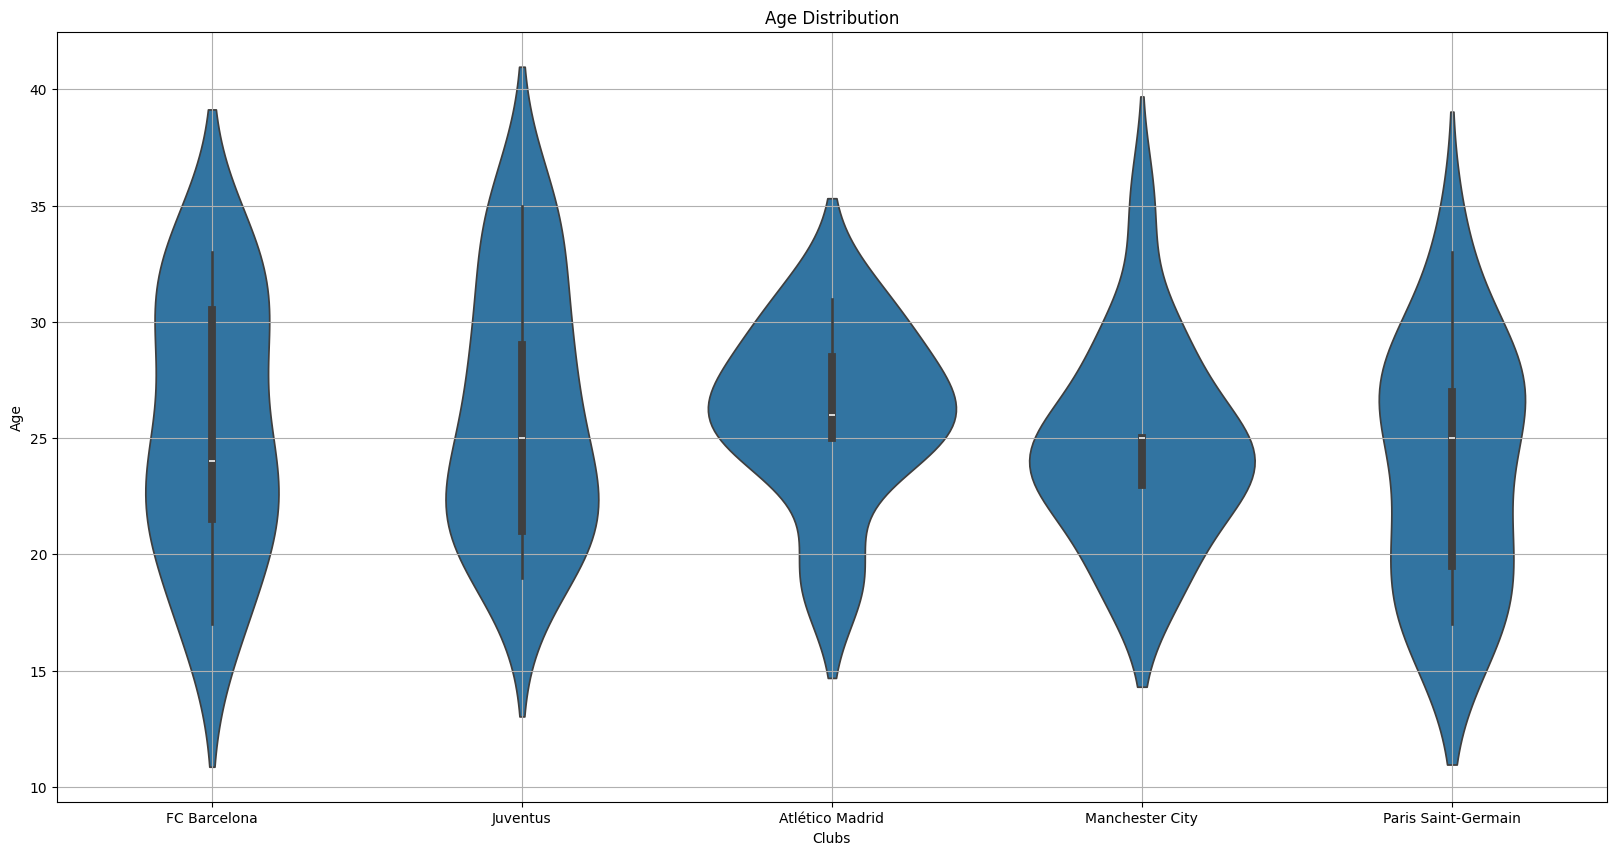

In [27]:
club_names = ['FC Barcelona', 'Juventus', 'Atlético Madrid', 'Paris Saint-Germain', 'Manchester City']

clubs = df.loc[df['club_name'].isin(club_names) & df['age']]

fig, ax = plt.subplots()

fig.set_size_inches(20,10)

ax = sns.violinplot(x = 'club_name', y = 'age', data = clubs)

ax.set_title("Age Distribution")
ax.set_xlabel("Clubs")
ax.set_ylabel("Age")

plt.grid()

plt.show()

# Nationwise playercounts and average potential

In [28]:
avg_best_cntry = df.groupby('nationality').apply(lambda x : np.average(x['overall'])).reset_index(name = 'Overall Ratings')

avg_best_player = df.groupby('nationality').apply(lambda x : x['overall'].count()).reset_index(name = "count of players")

In [29]:
display(HTML(avg_best_cntry.sort_values('Overall Ratings', ascending = False).head().to_html(index = False)))

nationality,Overall Ratings
Tanzania,76.0
Chad,73.0
Mozambique,72.2
Bermuda,72.0
Armenia,71.5


In [30]:
display(HTML(avg_best_player.sort_values('count of players', ascending = False).head().to_html(index = False)))

nationality,count of players
England,1685
Germany,1189
Spain,1072
France,984
Argentina,936


In [31]:
complete_best_avg = pd.merge(avg_best_cntry, avg_best_player, left_on = 'nationality', right_on = 'nationality', how = 'inner')

complete_best_avg['Overall Ratings'] = complete_best_avg['Overall Ratings'].round(0).astype(int)

display(HTML(complete_best_avg.head().to_html(index = False)))

nationality,Overall Ratings,count of players
Afghanistan,66,2
Albania,65,49
Algeria,71,52
Andorra,62,1
Angola,69,16


In [32]:
top_avg_best = complete_best_avg[complete_best_avg['count of players']>=200]

display(HTML(top_avg_best.sort_values(['Overall Ratings', 'count of players'], ascending = False).head().to_html(index = False)))

nationality,Overall Ratings,count of players
Brazil,71,887
Portugal,70,353
Spain,69,1072
Italy,69,421
Argentina,68,936


In [33]:
scatterfig = ex.scatter(top_avg_best, x = 'Overall Ratings', y = 'count of players', color = 'count of players', title = 'top countries with best overall ratings and their count of players', hover_data = ['nationality'])

scatterfig.update_layout(width = 1200, height = 700)

In [34]:
top_players = df[['short_name', 'overall', 'age', 'club_name']]

top_players.sort_values('overall', ascending = False, inplace = True)

top_30_players = top_players[:30]

ex.scatter(top_30_players, x = 'age', y = 'overall', color = 'age', size = 'overall', hover_data=['short_name', 'club_name'])

<ipython-input-34-2f15f54e866a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

